# Classification Models
## Asteroid Hazard Prediction

This notebook trains and evaluates machine learning classifiers
to predict whether an asteroid is potentially hazardous.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [2]:
df = pd.read_csv("../data/processed/neo_clean.csv")
df.head()


,absolute_magnitude_h,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,hazardous
0,10.41,22006.702711,49208.483223,5.578619,0.314929,False
1,10.41,22006.702711,49208.483223,4.394491,0.471486,False
2,10.41,22006.702711,49208.483223,4.816784,0.499257,False
3,10.41,22006.702711,49208.483223,4.596055,0.359786,False
4,10.41,22006.702711,49208.483223,5.920819,0.174073,False


In [3]:
X = df.drop(columns=['hazardous'])
y = df['hazardous']


In [4]:
X.head()
y.value_counts()



hazardous
False    629
True     275
Name: count, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [9]:
y_pred = log_model.predict(X_test_scaled)


In [10]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.77      0.98      0.86       126
        True       0.86      0.35      0.49        55

    accuracy                           0.78       181
   macro avg       0.82      0.66      0.68       181
weighted avg       0.80      0.78      0.75       181



In [11]:
roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1])


0.7841269841269841

In [12]:
import joblib

joblib.dump(log_model, "../models/logistic.pkl")
joblib.dump(scaler, "../models/scaler.pkl")


['../models/scaler.pkl']

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))

roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])


KNN Classification Report
              precision    recall  f1-score   support

       False       0.98      0.96      0.97       126
        True       0.91      0.96      0.94        55

    accuracy                           0.96       181
   macro avg       0.95      0.96      0.95       181
weighted avg       0.96      0.96      0.96       181



0.996103896103896

In [14]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))

roc_auc_score(y_test, svm.predict_proba(X_test_scaled)[:, 1])


SVM Classification Report
              precision    recall  f1-score   support

       False       0.81      0.94      0.87       126
        True       0.78      0.51      0.62        55

    accuracy                           0.81       181
   macro avg       0.80      0.72      0.74       181
weighted avg       0.80      0.81      0.79       181



0.928138528138528

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)   # Tree does NOT need scaling

y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])


Decision Tree Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       126
        True       1.00      1.00      1.00        55

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



1.0

In [16]:
models = {
    "Logistic Regression": log_model,
    "KNN": knn,
    "SVM": svm,
    "Decision Tree": dt
}

results = []

for name, model in models.items():
    if name == "Decision Tree":
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        
    auc = roc_auc_score(y_test, y_prob)
    results.append([name, auc])

results_df = pd.DataFrame(results, columns=["Model", "ROC-AUC"])
results_df


,Model,ROC-AUC
0,Logistic Regression,0.784127
1,KNN,0.996104
2,SVM,0.928139
3,Decision Tree,1.000000


In [17]:
joblib.dump(knn, "../models/knn.pkl")
joblib.dump(svm, "../models/svm.pkl")
joblib.dump(dt, "../models/decision_tree.pkl")


['../models/decision_tree.pkl']

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [19]:
X_clustering = X_train_scaled


In [20]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_clustering)


In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering)


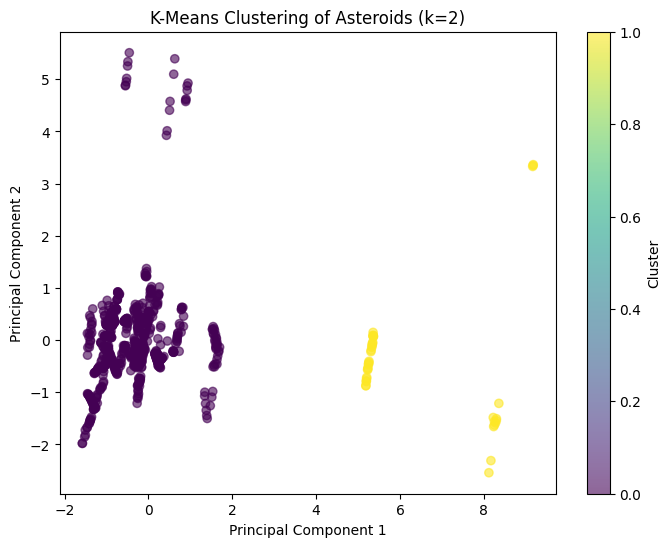

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=clusters,
    cmap='viridis',
    alpha=0.6
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering of Asteroids (k=2)")
plt.colorbar(label="Cluster")
plt.show()


In [23]:
cluster_df = pd.DataFrame({
    'cluster': clusters,
    'hazardous': y_train.values
})

cluster_df.groupby('cluster')['hazardous'].mean()


cluster
0    0.321637
1    0.000000
Name: hazardous, dtype: float64

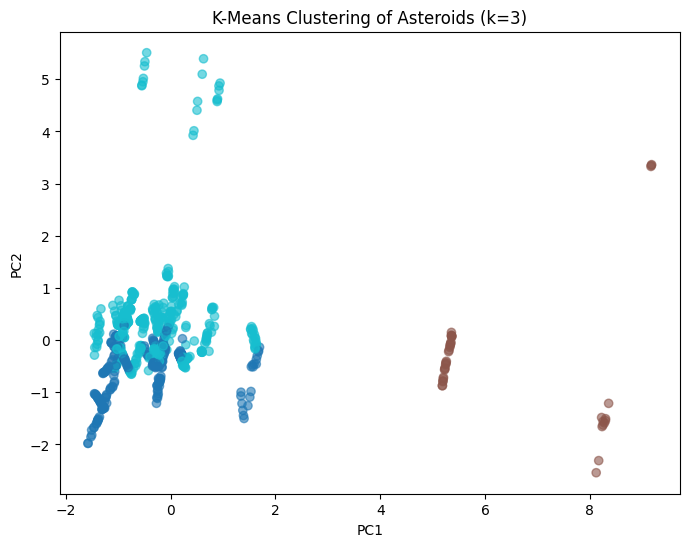

In [24]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
clusters3 = kmeans3.fit_predict(X_clustering)

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=clusters3,
    cmap='tab10',
    alpha=0.6
)
plt.title("K-Means Clustering of Asteroids (k=3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [25]:
joblib.dump(kmeans, "../models/kmeans.pkl")
joblib.dump(pca, "../models/pca.pkl")


['../models/pca.pkl']